In [13]:
import pandas as pd
import numpy as np
df= pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [14]:
print("the number of rows and columns in the dataset:") 
df.shape

the number of rows and columns in the dataset:


(148654, 13)

In [16]:
missing_values = df.isnull().sum() 
print("Missing values in each column:") 
print(missing_values)

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [17]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [22]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
dtype: object


In [18]:
df=df.drop(['Notes','Status'],axis =1)


In [19]:
df['BasePay'] = df['BasePay'].fillna(df['BasePay'].mean(), inplace=False)
df['Benefits'] = df['Benefits'].fillna(df['Benefits'].mean(), inplace=False)
df['OtherPay'] = df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=False)
df['OvertimePay'] = df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=False)


In [21]:
df.isnull().sum() 


Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

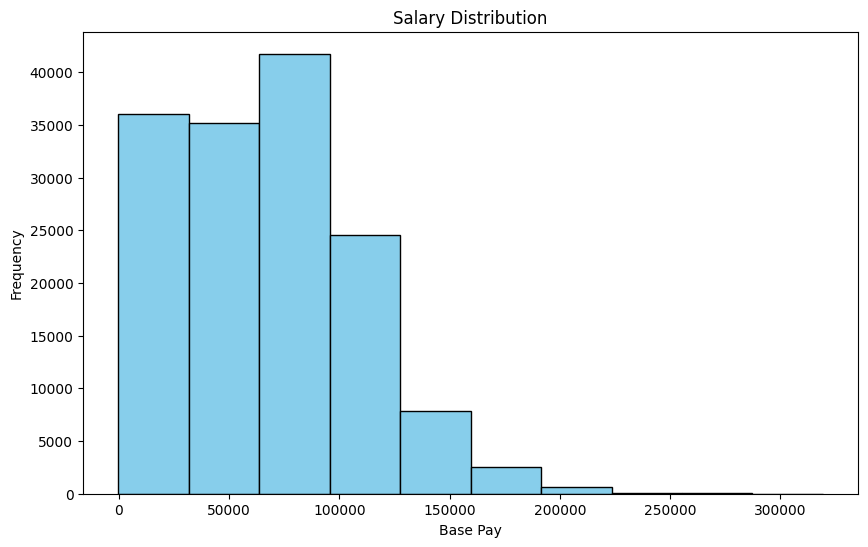

In [34]:
import matplotlib.pyplot as plt



# رسم مخطط توزيع الرواتب باستخدام histogram
plt.figure(figsize=(10, 6))
plt.hist(df['BasePay'], bins=10, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Base Pay')
plt.ylabel('Frequency')
plt.show()






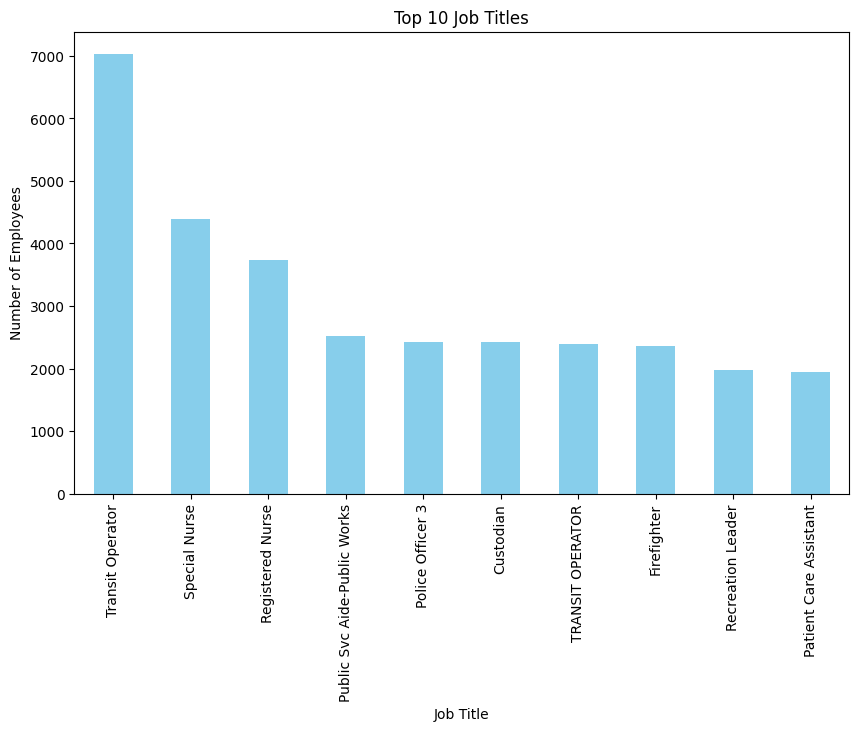

In [37]:
# رالوظيفية نسبة الموظفين حسب الفئات 
job_title_counts = df['JobTitle'].value_counts().head(10)  
# نأخذ أكثر 10 فئات وظيفية شيوعاً
plt.figure(figsize=(10, 6))
job_title_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Number of Employees')
plt.show()

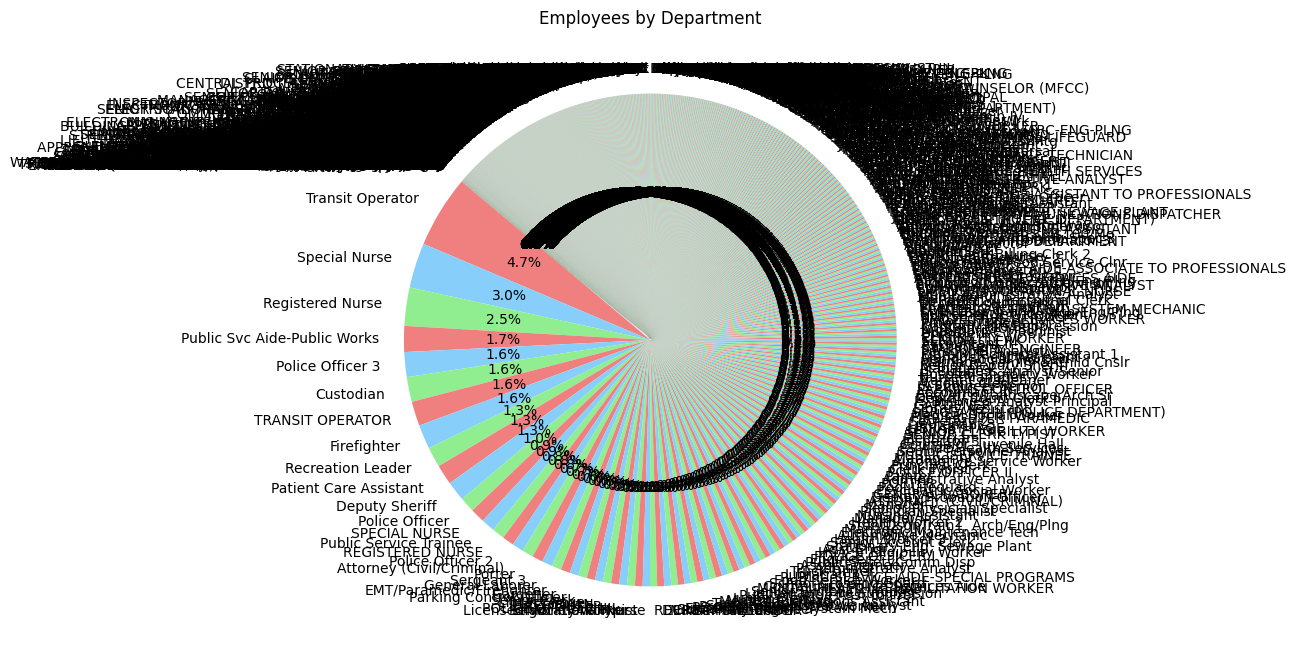

In [ ]:
# حساب عدد الموظفين في كل قسم
department_counts = df['JobTitle'].value_counts()

# رسم مخطط البيتشارت لتمثيل نسبة الموظفين في الأقسام المختلفة
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Employees by Department')
plt.show()

In [ ]:


# تجميع البيانات حسب العمود المحدد وحساب الإحصائيات
grouped_data = df.groupby(['JobTitle', 'Year']).agg({
    'BasePay': 'mean',
    'OvertimePay': 'mean',
    'OtherPay': 'mean',
    'Benefits': 'mean',
    'TotalPay': 'mean',
    'TotalPayBenefits': 'mean'
})

# طباعة النتائج
print(grouped_data)


                                                          BasePay  \
JobTitle                                       Year                 
ACCOUNT CLERK                                  2011  43300.806506   
ACCOUNTANT                                     2011  46643.172000   
ACCOUNTANT INTERN                              2011  28732.663958   
ACPO,JuvP, Juv Prob (SFERS)                    2014  62290.780000   
ACUPUNCTURIST                                  2011  66374.400000   
...                                                           ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011  52609.910000   
Youth Comm Advisor                             2012  57544.730000   
                                               2013  33174.840000   
                                               2014  32417.420000   
ZOO CURATOR                                    2011  43148.000000   

                                                     OvertimePay  \
JobTitle                          

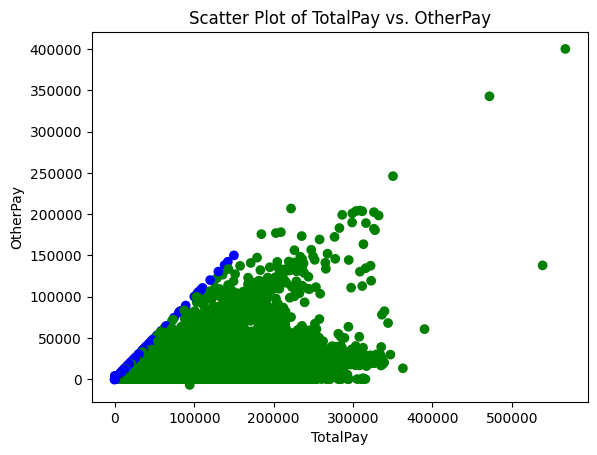

In [45]:


# Generate random colors for each data point
colors = np.where(df['TotalPay'] > df['OtherPay'], 'g', 'b')  # Red if TotalPay > Benefits, else Blue

# Plot the scatter plot with different colors for each column
plt.scatter(df['TotalPay'], df['OtherPay'], c=colors)
plt.title('Scatter Plot of TotalPay vs. OtherPay')
plt.xlabel('TotalPay')
plt.ylabel('OtherPay')
plt.show()

